In [1]:
import matplotlib

matplotlib.rcParams["font.family"] = "Malgun Gothic"
matplotlib.rcParams["font.size"] = 10.0
matplotlib.rcParams["axes.unicode_minus"] = False

In [2]:
## 데이터 전처리, 차트 그리는 연습

In [1]:
!dir  # 디렉터리 정보 확인 

 D 드라이브의 볼륨: DRIVERS
 볼륨 일련 번호: 9C6A-5858

 D:\pythondata\03_ex(차트와 전처리) 디렉터리


 D:\pythondata\03_ex(차트와 전처리) 디렉터리


 D:\pythondata\03_ex(차트와 전처리) 디렉터리


 D:\pythondata\03_ex(차트와 전처리) 디렉터리



파일을 찾을 수 없습니다.


In [4]:
pwd  # 현재 경로 확인 -> 맞는 곳에서 작업하고 있는지 확인(특히 코랩에서 활용)

'D:\\pythondata\\03_ex(차트와 전처리)'

In [5]:
import pandas as pd
import numpy as np

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.read_csv('전국_평균_분양가격(2013년_9월부터_2015년_8월까지).csv', encoding='cp949').head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [8]:
pd.read_csv('주택도시보증공사_전국_평균_분양가격(2019년_12월).csv', encoding='cp949').head(2)
# 위 행의 자료와 분양가격의 기준, 형식 등이 다름

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652


In [9]:
df_last = pd.read_csv('주택도시보증공사_전국_평균_분양가격(2019년_12월).csv', encoding='cp949')  # 인코딩까지 했어도 오류가 나면  engine: 'python' 
df_last.shape  ## 행, 열 값 확인 : 행 4335개, 열 5개

(4335, 5)

In [10]:
df_last.info()  # 데이터타입 확인
# 데이터프레임 형태
# 분양가격의 데이터타입은 object 형태 
# 보통 데이터로 갖고 올 때 정수로 가져올 수 있으면 정수로 데이터타입 나옴 -> 뭔가 있닫!
# 분양가격은 4058개로 일부 비어있음
# memory usage: 데이터 사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [11]:
df_last.tail(3)

,지역명,규모구분,연도,월,분양가격(㎡)
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


In [12]:
df_first = pd.read_csv('전국_평균_분양가격(2013년_9월부터_2015년_8월까지).csv', encoding='cp949')
df_first.shape

(17, 22)

In [13]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [14]:
df_last.isna().sum() # 컬럼당 널값의 개수 : isna() 널값이 있으면 True(1)임 -> True(1)의 합계가 즉 널값의 합계임
# df_last.isna().sum.sum : 전체 널값의 개수

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [15]:
# NaN 데이터가 있어도 mean함수는 NaN 값을 제외하고 계산하기 때문에 따로 제거 안해도 됨(제거해야할 때는 drop.na)

In [16]:
# df_last['분양가격(㎡)']=df_last['분양가격(㎡)'].str.replace(',','')

In [17]:
pd.to_numeric(df_last['분양가격(㎡)'] ,errors='coerce').isna().sum()  # errors='coerce' 

378

In [18]:
type(np.nan)

float

In [19]:
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'] ,errors='coerce') # NaN이 실수형이라 전체가 실수형이됨  # 분양가격이라는 새로운 열 생성

In [20]:
df_last.info() # 분양가격은 NaN 값 빼고 개수 세어져서 적음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 203.3+ KB


In [21]:
df_last['분양가격'].mean()

3238.128632802628

In [22]:
df_last['평당분양가격'] = df_last['분양가격']*3.3

In [23]:
df_last.sample(2)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
388,강원,전용면적 85㎡초과 102㎡이하,2016,2,NaN,NaN,NaN
2496,대전,전용면적 60㎡이하,2018,3,2498,2498.0,8243.4


In [24]:
df_last['분양가격(㎡)'].describe()  # 값 자체의 대표값을 확인 # count : 데이터 건수, top : 가장 많이 나온 값. freq : 그 빈도가 몇 번 나옴

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [25]:
df_last['평당분양가격'].describe()  
# mean: 평균, 50%: 중앙값 을 비교해서 비슷하게 위치하는지. 데이터가 정규분포를 따르는지 확인하고(쏠림현상이 있는지 확인하고) 부족한 부분의 데이터를 더 수집
# 25% ~ 75% : 박스 플롯
# 밑의 정보를 토대로 데이터가 제대로 수집이 되었는지, 어떤 점을 보완해야 할지 윤곽을 잡음

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [26]:
df_last.head(2)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6


In [27]:
# 개별건수만 있어야 함(중간집계된 데이터가 있으면 x) ->전체 x
# 

In [28]:
df_last.규모구분.value_counts()

전체                   867
전용면적 60㎡이하           867
전용면적 60㎡초과 85㎡이하     867
전용면적 85㎡초과 102㎡이하    867
전용면적 102㎡초과          867
Name: 규모구분, dtype: int64

In [29]:
df_last.규모구분.unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [30]:
# '전용면적' 삭제, '이하'와'초과' -> '~'로 변경
import re
df_last['규모구분']=df_last['규모구분'].str.replace('전용면적','').str.replace('초과','~').str.replace('이하','').str.replace(' ','').str.strip()
df_last['규모구분']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 규모구분, Length: 4335, dtype: object

In [31]:
df_last.info()  # memory usage 용량 확인
# 필요 없는 분양가격(㎡)열 제거, 규모구분 -> 전용면적으로 열이름 변경해서 용량 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [32]:
df_last.rename(columns={'규모구분':'전용면적'},inplace= True)
# df_last.columns = ['지역명','전용면적','연도','월','분양가격(㎡)','분양가격','평당분양가격']
df_last.drop(columns='분양가격(㎡)',inplace= True)
df_last.info() # 용량 줄어든 걸 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   전용면적    4335 non-null   object 
 2   연도      4335 non-null   int64  
 3   월       4335 non-null   int64  
 4   분양가격    3957 non-null   float64
 5   평당분양가격  3957 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


In [91]:
pd.DataFrame.plot() # kind(종류) 기본은 line

TypeError: __init__() missing 1 required positional argument: 'data'

<AxesSubplot: ylabel='지역명'>

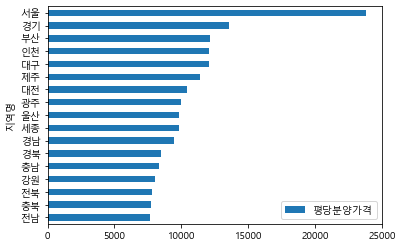

In [34]:
df_last[df_last['전용면적']!='전체'].groupby(['지역명'])['평당분양가격'].mean().to_frame().sort_values('평당분양가격').plot(kind='barh') # plot.bar도 됨
# dropna: 'bool' = True로 기본 설정됨 -> 그룹화할 때 NaN값은 제외함
# 열이 하나일 때는 대괄호 안 붙여도 문제 X 2개부터는 묶기
# 평당분양가격 열만 보고 싶을 때는 뒤에 표시 -> 시리즈로 나옴 -> to_frame()  쓰면 데이터프레임으로 바뀜
# 리턴되는 열이 여러개면 데이터프레임으로 나옴
# sort_values : 정렬
# df_last[df_last['전용면적']!='전체'] : 전용면적 열에서 전체로 명시된 행을 뺌(원데이터에는 그대로 있음)

In [35]:
# 전용면적, 지역별 평당문양가격

In [36]:
df_last.groupby(['전용면적','지역명'])['평당분양가격'].mean().to_frame().reset_index()

,전용면적,지역명,평당분양가격
0,102㎡~,강원,8311.380000
1,102㎡~,경기,14771.790000
2,102㎡~,경남,10358.363265
3,102㎡~,경북,9157.302000
4,102㎡~,광주,11041.532432
...,...,...,...
80,전체,전남,7283.562000
81,전체,전북,7292.604000
82,전체,제주,10784.994000
83,전체,충남,7815.324000


In [37]:
g = df_last.groupby(['전용면적','지역명'])['평당분양가격'].mean().to_frame()

In [38]:
g.unstack()  # 피벗형태처럼 

평당분양가격                                                      \
지역명                강원         경기            경남           경북            광주   
전용면적                                                                        
102㎡~     8311.380000  14771.790  10358.363265  9157.302000  11041.532432   
60㎡       7567.098000  13251.744   8689.175000  7883.172000   9430.666667   
60㎡~85㎡   7485.588000  12523.566   8618.676000  8061.372000   9910.692000   
85㎡~102㎡  8749.557143  13677.774  10017.612000  8773.814634   9296.100000   
전체        7477.536000  12559.602   8658.672000  8078.532000   9903.630000   

                                                                          \
지역명                 대구            대전         부산         서울            세종   
전용면적                                                                       
102㎡~     13087.338000  14876.871429  13208.250  23446.038  10106.976000   
60㎡       11992.068000   9176.475000  11353.782  23212.794   9323.927027   
60㎡~85㎡   11778.690000   9711.372000  11864.820  22786.830   9775.458000   
85㎡~102㎡  11140.642857   9037.430769  12072.588  25943.874   9847.926000   
전체        11771.298000   9786.018000  11936.166  22610.346   9805.422000   

                                                                           \
지역명                 울산            인천         전남          전북            제주   
전용면적                                                                        
102㎡~      9974.448000  14362.030435  8168.4900  8193.57000  10522.787234   
60㎡        9202.106897  11241.318000  7210.1700  7609.93200  14022.221053   
60㎡~85㎡   10502.531707  11384.406000  7269.2400  7271.35200  10621.314000   
85㎡~102㎡   8861.007692  11527.560000  7908.8625  8275.78125  10709.082353   
전체        10492.712195  11257.026000  7283.5620  7292.60400  10784.994000   

                                 
지역명                충남        충북  
전용면적                             
102㎡~     8689.169388  8195.352  
60㎡       7911.156000  7103.118  
60㎡~85㎡   7818.954000  7264.488  
85㎡~102㎡  9120.045000  8391.306  
전체        7815.324000  7219.014

In [39]:
g.unstack().T

전용면적               102㎡~           60㎡       60㎡~85㎡      85㎡~102㎡  \
       지역명                                                           
평당분양가격 강원    8311.380000   7567.098000   7485.588000   8749.557143   
       경기   14771.790000  13251.744000  12523.566000  13677.774000   
       경남   10358.363265   8689.175000   8618.676000  10017.612000   
       경북    9157.302000   7883.172000   8061.372000   8773.814634   
       광주   11041.532432   9430.666667   9910.692000   9296.100000   
       대구   13087.338000  11992.068000  11778.690000  11140.642857   
       대전   14876.871429   9176.475000   9711.372000   9037.430769   
       부산   13208.250000  11353.782000  11864.820000  12072.588000   
       서울   23446.038000  23212.794000  22786.830000  25943.874000   
       세종   10106.976000   9323.927027   9775.458000   9847.926000   
       울산    9974.448000   9202.106897  10502.531707   8861.007692   
       인천   14362.030435  11241.318000  11384.406000  11527.560000   
       전남    8168.490000   7210.170000   7269.240000   7908.862500   
       전북    8193.570000   7609.932000   7271.352000   8275.781250   
       제주   10522.787234  14022.221053  10621.314000  10709.082353   
       충남    8689.169388   7911.156000   7818.954000   9120.045000   
       충북    8195.352000   7103.118000   7264.488000   8391.306000   

전용면적                  전체  
       지역명                
평당분양가격 강원    7477.536000  
       경기   12559.602000  
       경남    8658.672000  
       경북    8078.532000  
       광주    9903.630000  
       대구   11771.298000  
       대전    9786.018000  
       부산   11936.166000  
       서울   22610.346000  
       세종    9805.422000  
       울산   10492.712195  
       인천   11257.026000  
       전남    7283.562000  
       전북    7292.604000  
       제주   10784.994000  
       충남    7815.324000  
       충북    7219.014000

In [40]:
pd.pivot_table(df_last,index=['지역명'],values=['평당분양가격'])  
# 피벗테이블  aggfunc: 'AggFuncType' = 'mean',기본이 평균값,  dropna: 'bool' = True, 결측값 빼고 계산
# df_last.groupby(['지역명'])['평당분양가격'].mean() 과 같음

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [41]:
pd.pivot_table(df_last,index=['지역명'],values=['평당분양가격'],columns=['전용면적']).round() 
# 데이터 프레임

평당분양가격                                    
전용면적    102㎡~      60㎡  60㎡~85㎡ 85㎡~102㎡       전체
지역명                                              
강원     8311.0   7567.0   7486.0   8750.0   7478.0
경기    14772.0  13252.0  12524.0  13678.0  12560.0
경남    10358.0   8689.0   8619.0  10018.0   8659.0
경북     9157.0   7883.0   8061.0   8774.0   8079.0
광주    11042.0   9431.0   9911.0   9296.0   9904.0
대구    13087.0  11992.0  11779.0  11141.0  11771.0
대전    14877.0   9176.0   9711.0   9037.0   9786.0
부산    13208.0  11354.0  11865.0  12073.0  11936.0
서울    23446.0  23213.0  22787.0  25944.0  22610.0
세종    10107.0   9324.0   9775.0   9848.0   9805.0
울산     9974.0   9202.0  10503.0   8861.0  10493.0
인천    14362.0  11241.0  11384.0  11528.0  11257.0
전남     8168.0   7210.0   7269.0   7909.0   7284.0
전북     8194.0   7610.0   7271.0   8276.0   7293.0
제주    10523.0  14022.0  10621.0  10709.0  10785.0
충남     8689.0   7911.0   7819.0   9120.0   7815.0
충북     8195.0   7103.0   7264.0   8391.0   7219.0

In [42]:
### 시각화
result = pd.pivot_table(df_last,index=['지역명'],values=['평당분양가격']).round()

<AxesSubplot: ylabel='Frequency'>

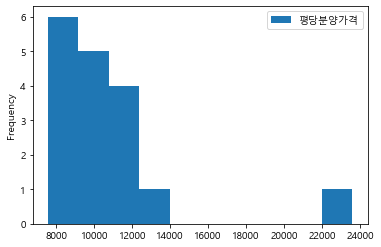

In [43]:
result.plot(kind='hist')  # 히스토그램은 연속값. 작은 값 ~ 큰 값 사이를 10개로 나누고 각 범위에 데이터가 몇 개 있는지 확인
# 값(아래에선 평당분양가격)만 있으면 돼서 1차원 데이터(bar,line은 2차원 데이터)

<AxesSubplot: >

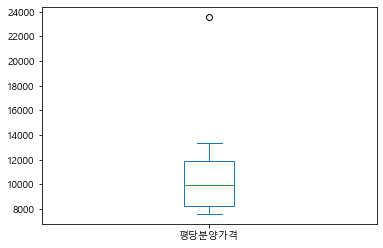

In [44]:
# 데이터를 순서대로
result.plot(kind='box')
# 25%~75%로 박스 만들고 
# 데이터의 분포와 이상치를 동시에 보여주면서 서로 다른 데이터군을 쉽게 비교
# 최솟값 : 제 1사분위에서 1.5 IQR1을 뺀 위치이다.(그 위치에 데이터가 없으면 그 다음으로 작은 값) 정상범위를 1.5 IQR1을 뺀 위치만큼 인정
# 제 1사분위(Q1) : 25%의 위치를 의미한다.
# 제 2사분위(Q2) : 50%의 위치로 중앙값(median)을 의미한다.
# 제 3사분위(Q3) : 75%의 위치를 의미한다.
# 최댓값 : 제 3사분위에서 1.5 IQR을 더한 위치이다.(그 위치에 데이터가 없으면 그 다음으로 큰 값) 정상범위를 1.5 IQR1을 더한 위치만큼 인정
# 최솟값과 최댓값을 넘어가는 위치에 있는 값을 이상치(Outlier)

<AxesSubplot: >

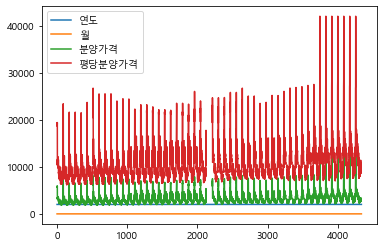

In [45]:
df_last.plot()

In [46]:
result

,평당분양가격
지역명,
강원,7891.0
경기,13357.0
경남,9269.0
경북,8377.0
광주,9952.0
대구,11981.0
대전,10253.0
부산,12087.0
서울,23600.0


<AxesSubplot: >

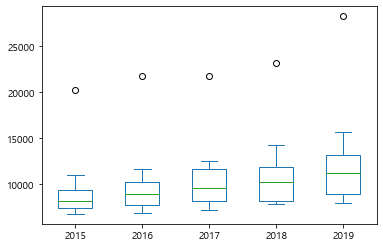

In [47]:
df_last.pivot_table(index='지역명',columns='연도', values='평당분양가격').plot(kind='box')
# 위 행에서 인덱스를 지역명으로하고 연도 열을 추가하고 싶음(연도별로 보고 싶음)
# 지역별 평균
# 지역별로 낮은 값은 비슷
# 높은 값은 변화가 있어서 올라감
# 이상치 : 다른 지역보다 평당분양가가 굉장히 비싼 지역이 있었음
# 지역별로 평당분양가격ㅇ
# 컬럼단위로 집계

In [48]:
df_last.pivot_table(index='월',columns='연도', values='평당분양가격')

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


<AxesSubplot: >

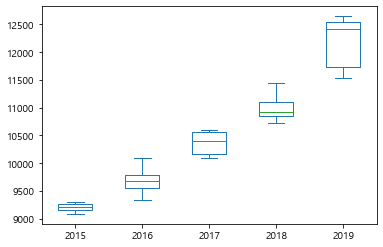

In [49]:
df_last.pivot_table(index='월',columns='연도', values='평당분양가격').plot(kind='box')
# 월별 평균
# 2015년도는 NaN 값 때문에 박스 크기가 작음
# 평당 분양가격이 해가 갈수록 오르고 있음

<AxesSubplot: >

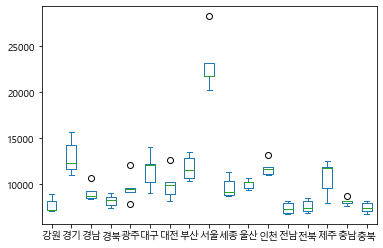

In [50]:
df_last.pivot_table(index='연도',columns='지역명', values='평당분양가격').plot(kind='box')
# 강원도, 경기도 등은 이상치가 없음

<AxesSubplot: xlabel='지역명', ylabel='평당분양가격'>

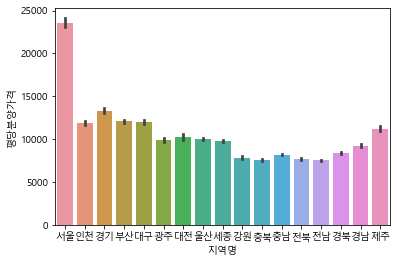

In [51]:
# 
import seaborn as sns
sns.barplot(data=df_last,x='지역명',y='평당분양가격')  # 평균을 알아서 계산해 보여줌(평균이 기본값)

<AxesSubplot: xlabel='연도', ylabel='평당분양가격'>

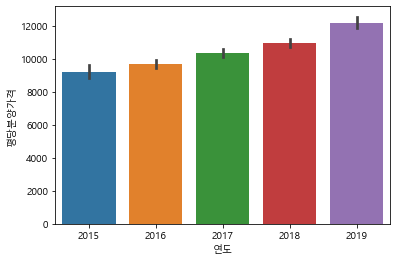

In [52]:
import seaborn as sns
sns.barplot(data=df_last,x='연도',y='평당분양가격')  # 평균을 알아서 계산해 보여줌(평균이 기본값)

<AxesSubplot: xlabel='연도', ylabel='평당분양가격'>

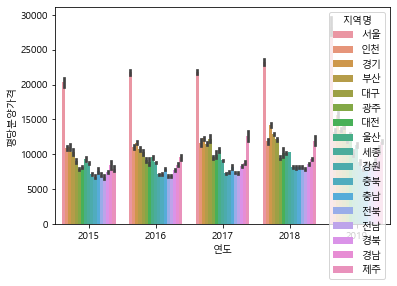

In [53]:
import seaborn as sns
sns.barplot(data=df_last,x='연도',hue='지역명',y='평당분양가격')

<AxesSubplot: xlabel='지역명', ylabel='평당분양가격'>

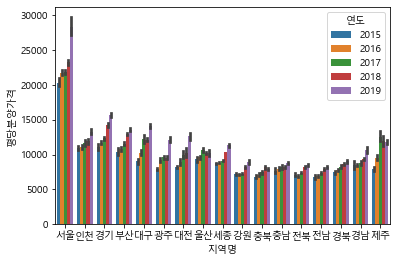

In [54]:
import seaborn as sns
sns.barplot(data=df_last,x='지역명',hue='연도',y='평당분양가격')

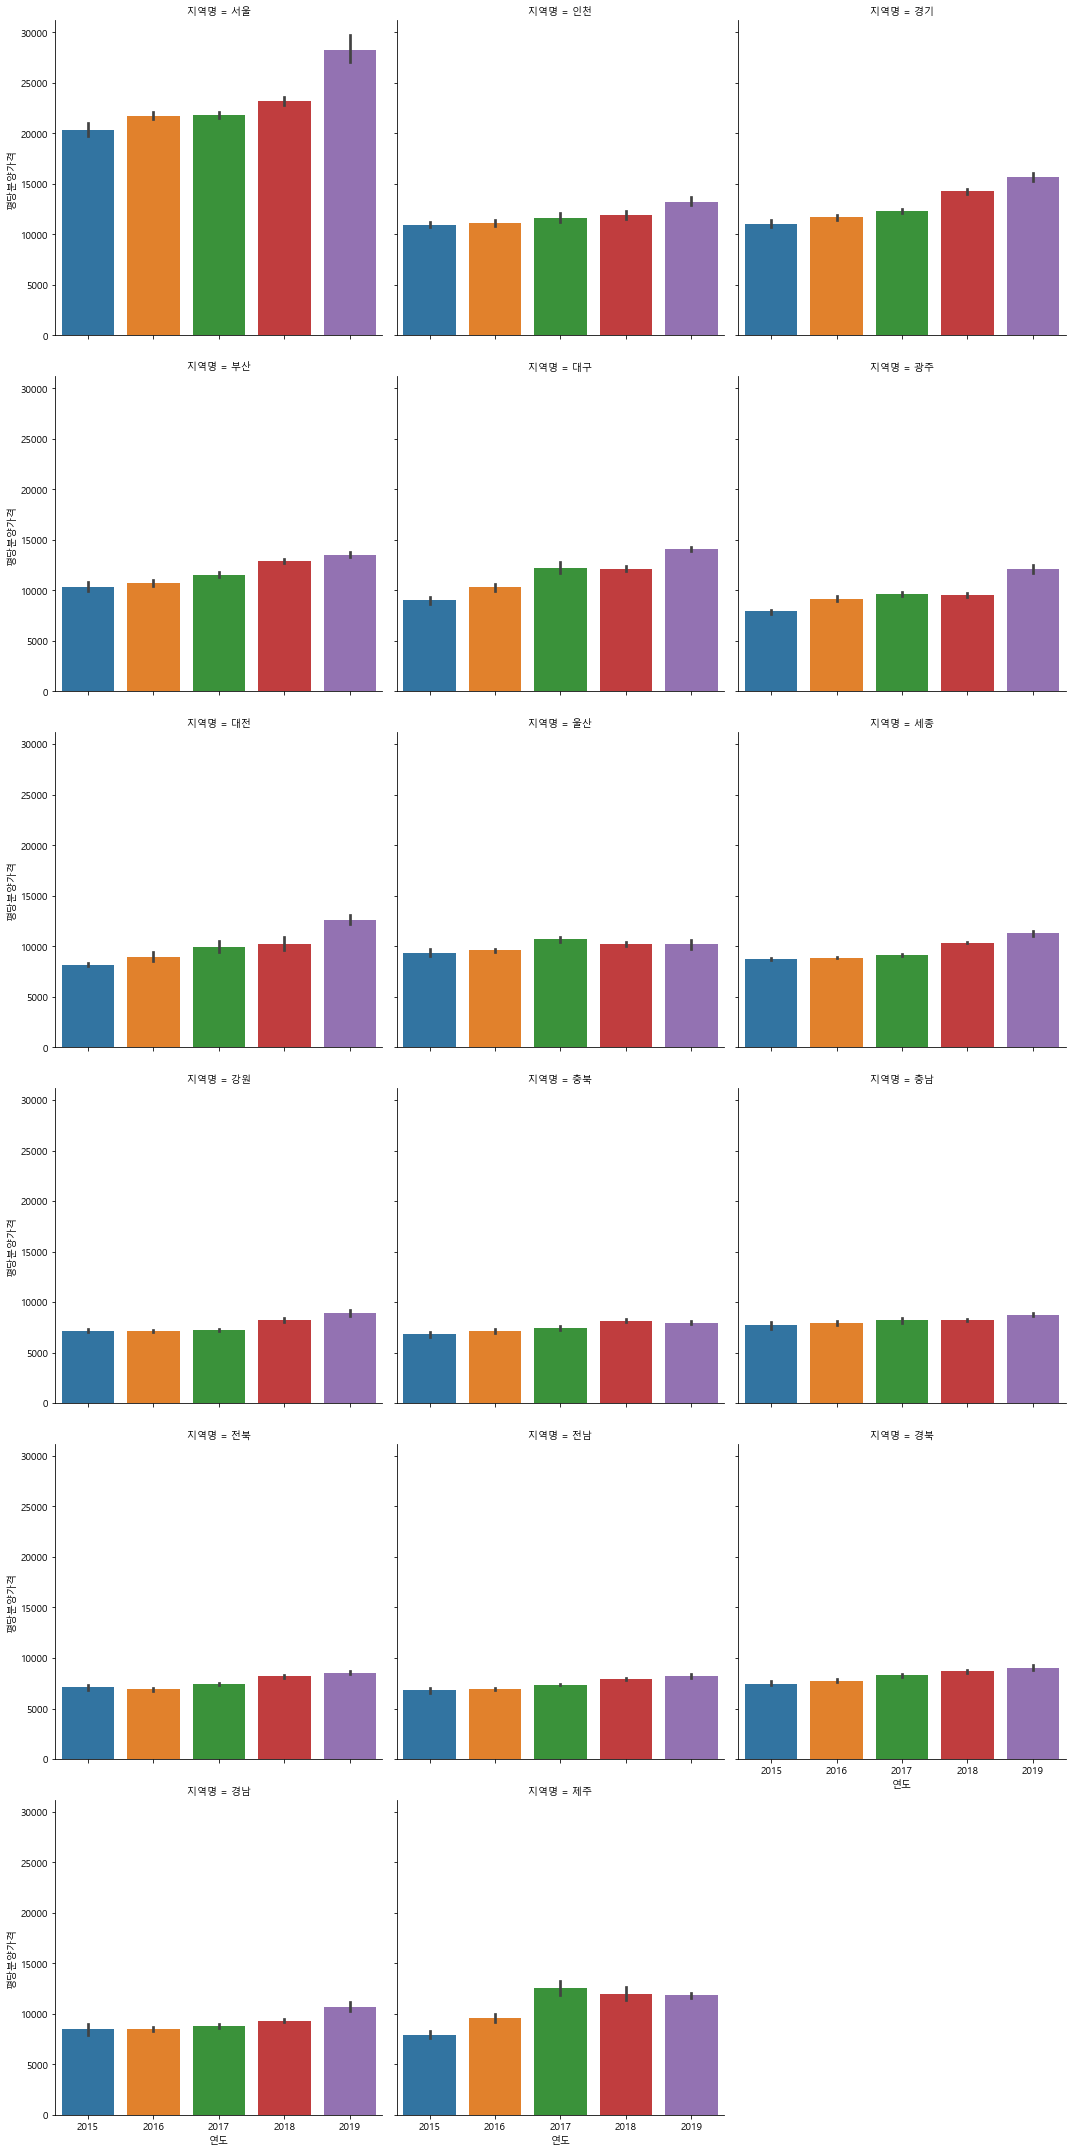

In [81]:
sns.catplot(data=df_last, x='연도',y='평당분양가격',kind='bar',col='지역명',col_wrap=3) # 기본값이 중간값
# 지역별 연도별
# col_wrap=3  한 행에 3개씩 들가게

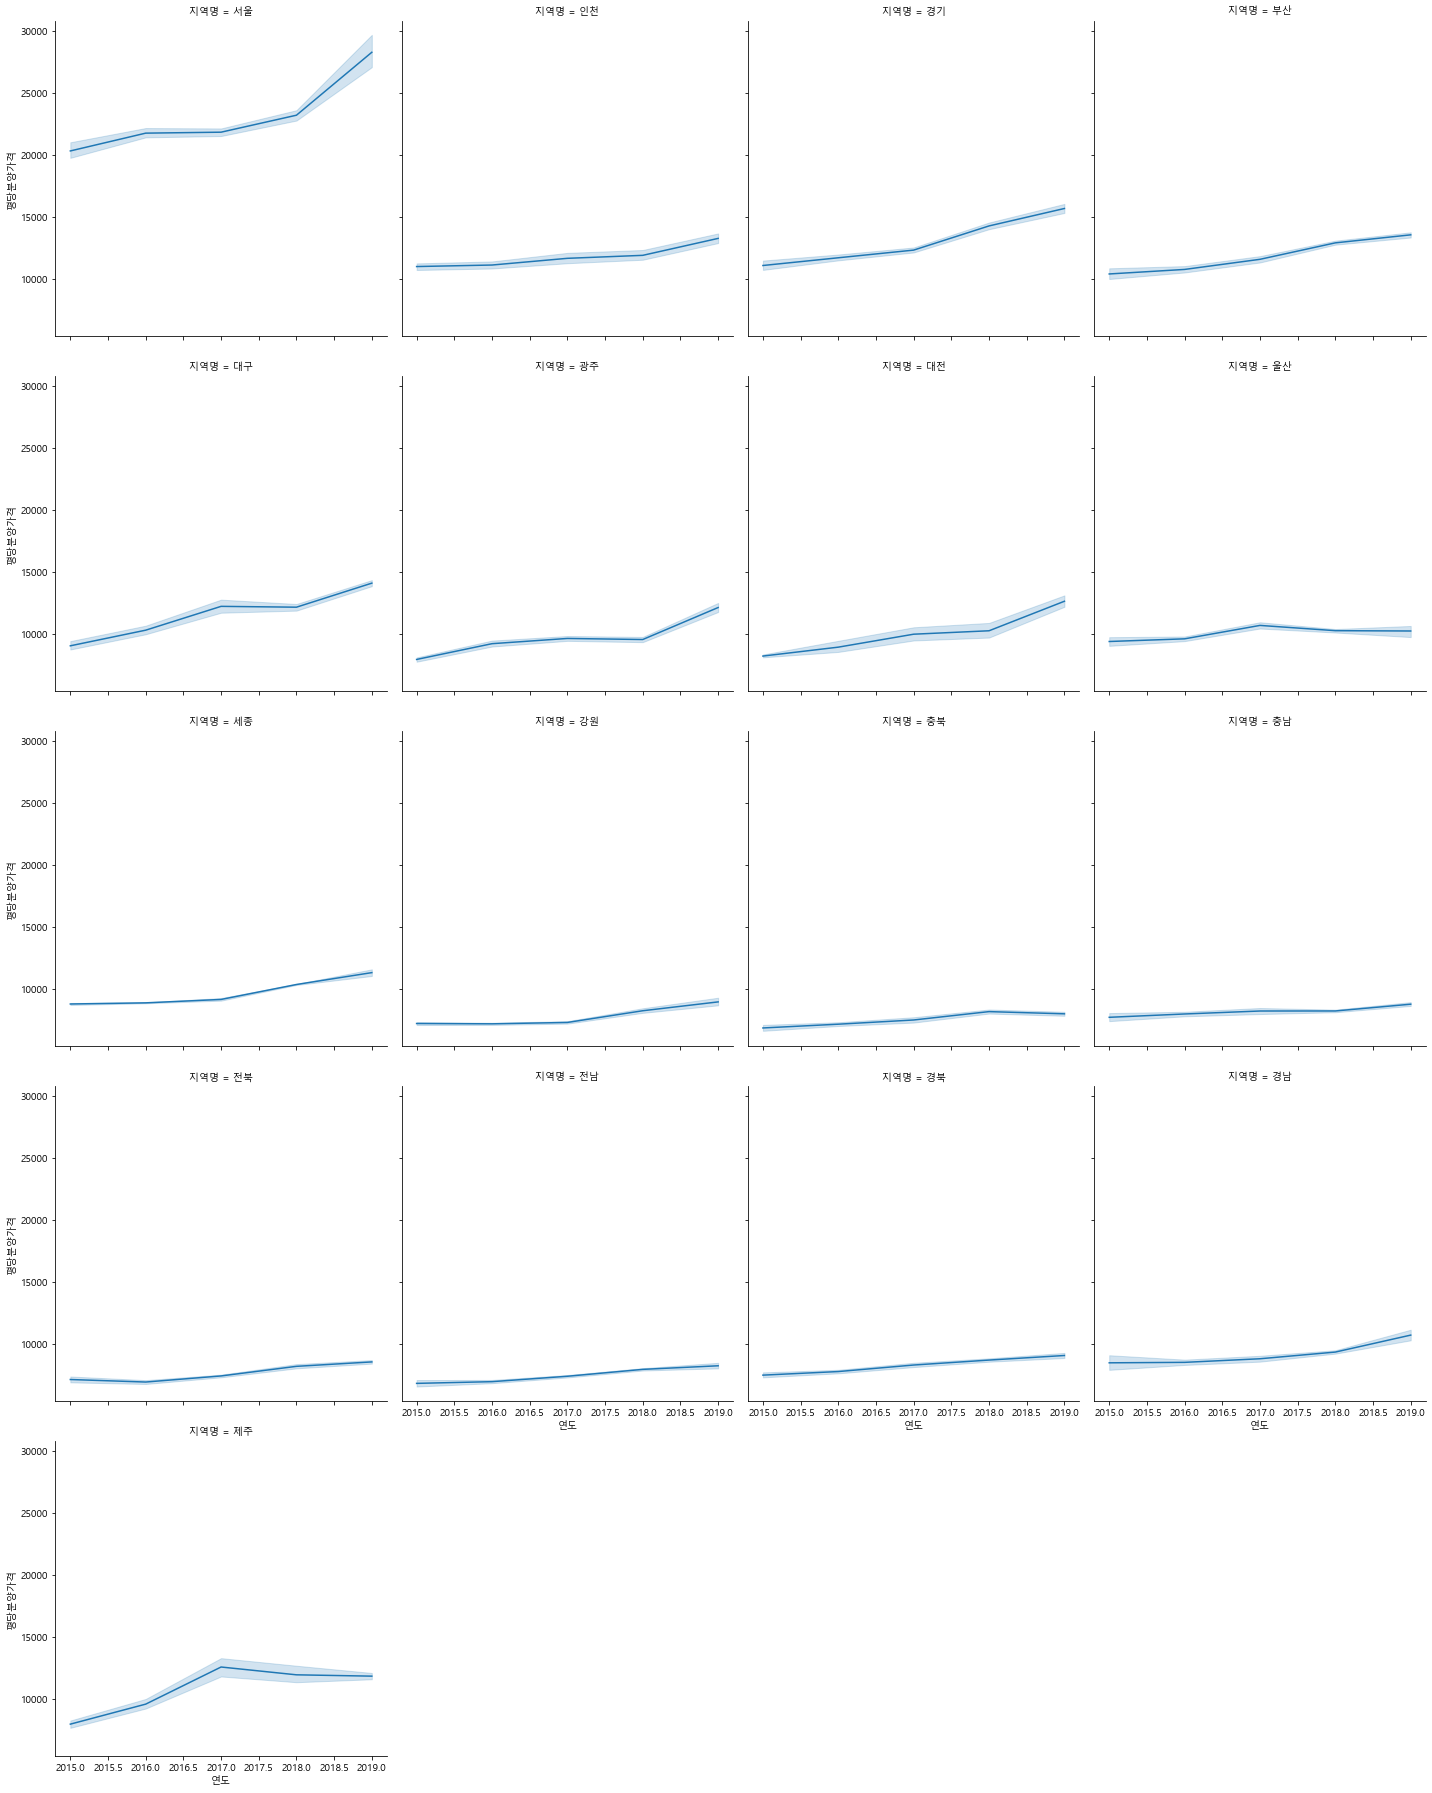

In [80]:
sns.relplot(data=df_last, x='연도',y='평당분양가격',kind = 'line',col='지역명',col_wrap=4)

In [57]:
pd.read_csv('전국_평균_분양가격(2013년_9월부터_2015년_8월까지).csv', encoding='cp949').head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [58]:
pd.options.display.max_columns = 25 # 열을 더 많이 표시

In [59]:
pd.read_csv('전국_평균_분양가격(2013년_9월부터_2015년_8월까지).csv', encoding='cp949')

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,8493,8627,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,10397,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,8527,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [60]:
df_last

,지역명,전용면적,연도,월,분양가격,평당분양가격
0,서울,전체,2015,10,5841.0,19275.3
1,서울,60㎡,2015,10,5652.0,18651.6
2,서울,60㎡~85㎡,2015,10,5882.0,19410.6
3,서울,85㎡~102㎡,2015,10,5721.0,18879.3
4,서울,102㎡~,2015,10,5879.0,19400.7
...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882.0,12810.6
4331,제주,60㎡,2019,12,NaN,NaN
4332,제주,60㎡~85㎡,2019,12,3898.0,12863.4
4333,제주,85㎡~102㎡,2019,12,NaN,NaN


In [61]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [62]:
df_first_melt = df_first.melt(id_vars='지역',var_name='기간',value_name='평당분양가격') # id_vars 구분하는 변수값 value_vars, 인덱스를 새로 부여하는 것이 디폴트
# 뭉칠 것을 빼고 그대로 유지해야하는 것은 id_vars=에 들어감
# 박스 플롯을 그릴 때처럼은 피벗테이블을 이용해 각 열에 연도가 들어가도록
# 집계내서 다른 용도로 사용하려면 melt를 이용
# 기간을 연도와 월로 분리(정수형으로)

In [64]:
df_first_melt.head(2)

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111


In [66]:
df_first_melt['연도']=df_first_melt['기간'].str.split('년').str.get(0).astype(int)
df_first_melt['월']=df_first_melt['기간'].str.split('년').str.get(-1).str.replace('월','').astype(int)

In [67]:
df_first_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      357 non-null    object
 1   기간      357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int32 
 4   월       357 non-null    int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 11.3+ KB


In [68]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   전용면적    4335 non-null   object 
 2   연도      4335 non-null   int64  
 3   월       4335 non-null   int64  
 4   분양가격    3957 non-null   float64
 5   평당분양가격  3957 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


In [69]:
df_fire=pd.read_csv('전라북도_소방서별 소방자동차 현황_20170810..csv',encoding='cp949')

In [70]:
df_fire.head()

,시군,고가차 53(m),고가차 52(m),고가차 46(m),굴 절차 36(m),굴 절차 28(m),굴 절차 27(m),배 연 차,구 급 차,구조차 버스,구조차 공작,구조차 산악,...,순 찰 차,진 단 차,굴 삭 기,"트레일러 공기,양수",트레일러 보트,이동정비차,이동체험차,장비운반차,이동중계차,산불진화차,유 조 차,버 스
0,본부,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,1.0,1.0,1.0,1,1.0,NaN,1.0,2.0
1,덕진,1.0,NaN,NaN,NaN,NaN,1.0,NaN,10.0,1.0,1.0,1.0,...,1,1.0,NaN,1.0,1.0,NaN,NaN,1,NaN,1.0,NaN,NaN
2,완산,NaN,1.0,NaN,NaN,1.0,NaN,1.0,10.0,NaN,2.0,2.0,...,1,1.0,NaN,1.0,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN
3,군산,NaN,1.0,NaN,1.0,NaN,NaN,1.0,8.0,1.0,1.0,1.0,...,1,1.0,1.0,2.0,1.0,NaN,NaN,2,NaN,3.0,NaN,NaN
4,익산,1.0,NaN,NaN,1.0,NaN,NaN,1.0,8.0,1.0,1.0,1.0,...,1,1.0,NaN,1.0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [71]:
df_fire.melt(id_vars='시군',var_name='차종',value_name='대수')
# 시군별로 차종에 관계없이 몇 대 인지 궁금
# id_vars=가 아닌건 기본적으로 value에 들어감

,시군,차종,대수
0,본부,고가차 53(m),NaN
1,덕진,고가차 53(m),1.0
2,완산,고가차 53(m),NaN
3,군산,고가차 53(m),NaN
4,익산,고가차 53(m),1.0
...,...,...,...
369,남원,버 스,NaN
370,김제,버 스,NaN
371,고창,버 스,NaN
372,부안,버 스,NaN


In [72]:
# concat 하기 위해 열 이름 맞추기
df1=df_first_melt[['지역','연도','월','평당분양가격']]

In [73]:
df2=df_last[['지역명','연도','월','평당분양가격']]

In [74]:
df2.columns=['지역','연도','월','평당분양가격']

In [75]:
pd.concat([df1,df2])

,지역,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4330,제주,2019,12,12810.6
4331,제주,2019,12,NaN
4332,제주,2019,12,12863.4
4333,제주,2019,12,NaN


In [83]:
#### join()함수 사용해서 2개의 데이터프레임을 연결 ####
d1 = pd.read_csv('survey_visited.csv')
d2 = pd.read_csv('survey_site.csv')

In [86]:
d1.head(3)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07


In [85]:
d2

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40
3,AA-1,-50.00,-127.00


In [89]:
pd.merge(d1,d2,left_on = 'site',right_on ='name',how='outer') 
# inner 조인 : 키값이 있는 것끼리 연결해서 가지고 옴 # outer 조인 : 키값이 없는 것은 nan으로 가져옴
# 양 데이터프레임의 연결할 열 이름이 일치하면 생략 가능, 서로 다르면 left_on ='' right_on ='' 이름으로 지정
# 연결점이 되는 열 값에서 양 데이터프레임에 모두 있지 않은 값은 제외됨(ex. d2의 AA-1) : inner 조인
# 모두 있지 않은 값도 포함하고 싶다면? : outer 조인
# 모두 있는 값 + 모두 있지 않은 값 중 만약 왼쪽 값만 포함하고 싶다면? : left 조인

,ident,site,dated,name,lat,long
0,619.0,DR-1,1927-02-08,DR-1,-49.85,-128.57
1,622.0,DR-1,1927-02-10,DR-1,-49.85,-128.57
2,844.0,DR-1,1932-03-22,DR-1,-49.85,-128.57
3,734.0,DR-3,1939-01-07,DR-3,-47.15,-126.72
4,735.0,DR-3,1930-01-12,DR-3,-47.15,-126.72
5,751.0,DR-3,1930-02-26,DR-3,-47.15,-126.72
6,752.0,DR-3,NaN,DR-3,-47.15,-126.72
7,837.0,MSK-4,1932-01-14,MSK-4,-48.87,-123.40
8,NaN,NaN,NaN,AA-1,-50.00,-127.00
